In [72]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from collections import Counter

In [29]:
def getReviews (files, processed_path):
    """
    Extract reviews from raw data.
    
    :param files: File path
    :type  files: str
    :param processed_path: File path for the extracted reviews
    :type  processed_path: str
    :returns (list of dataframes, list of business names, list of csv file names)
    :rtype (list, list, list)
    """
    
    csv_files = glob.glob(files)
    names = [name.strip('Raw_Scraped_Data/').strip('.csv') for name in csv_files]
    csv_reviews = []
    review_files = pd.DataFrame ()
    for (i, file) in enumerate (csv_files):
        csv = pd.read_csv (file)["review-content"]
        csv = csv.dropna().reset_index().drop('index', axis=1)
        csv.columns = [names[i]]
        csv_reviews.append (csv)
        review_files = pd.concat ([review_files, csv], axis=1)
        
    review_files.to_csv (processed_path)
    return (csv_reviews, names, csv_files)

csv_reviews, names, csv_files = getReviews ("Raw_Scraped_Data/*.csv", 
                                            'Processed_Data/all_reviews.csv')

In [31]:
csv_reviews[1].head()

BOHEMIAN_Gaslight
0  So I live relatively close now, and an update ...
1  Roasted: came here because I couldn't drink th...
2  Gaslight - the coffee shop designed for the ev...
3  It's good coffee but it's a little bit overpri...
4  Hands down one of my favorite coffee shops, ev...

In [32]:
names[:5]

['BOHEMIAN_gallery',
 'BOHEMIAN_Gaslight',
 'BOHEMIAN_Intelligentsia',
 'BOHEMIAN_Ipsento',
 'BOHEMIAN_volume']

In [33]:
csv_files[:5]

['Raw_Scraped_Data/BOHEMIAN_gallery.csv',
 'Raw_Scraped_Data/BOHEMIAN_Gaslight.csv',
 'Raw_Scraped_Data/BOHEMIAN_Intelligentsia.csv',
 'Raw_Scraped_Data/BOHEMIAN_Ipsento.csv',
 'Raw_Scraped_Data/BOHEMIAN_volumes.csv']

In [76]:
def createWordList (reviews, remove_punct=True):
    """
    Create a list of reviews.
    
    :param reviews: List of dataframes
    :type  reviews: list
    :param remove_punct: If true, remove punctuations.
    :type  remove_punct: bool
    :returns: A list where each element is string of all reviews for one business. 
    :rtype:  list
    """
    
    word_list = []
    for (i, csv) in enumerate (reviews):
        all_words = ""
        for (index, row) in csv.iterrows():
            all_words += row [names[i]]
        all_words = all_words.lower()
        
        if remove_punct:
            word_list.append (re.sub('[()!@%^&*-+\$.,?"#\xa0]', ' ', all_words))
        else:
            word_list.append(all_words)
    return word_list

word_list = createWordList (csv_reviews)
word_list[1][:500]

"so i live relatively close now  and an update is due   while it's still fairly difficult to get a seat  i dig this spot   the coffee is good  the food is good  better options then most shops   and they recently upgraded many of their tables and chairs   internet never seems to be an issue here  and the staff has grown on me  for the most part    they also finally added some curtains so if you are sitting by the windows in the afternoon you aren't constantly blinded i give them 4 5 stars  subtrac"

In [77]:
punct_word_list = createWordList (csv_reviews, remove_punct=False)
punct_word_list[1][:500]

"so i live relatively close now, and an update is due. \xa0while it's still fairly difficult to get a seat, i dig this spot. \xa0the coffee is good, the food is good (better options then most shops), and they recently upgraded many of their tables and chairs. \xa0internet never seems to be an issue here, and the staff has grown on me (for the most part). \xa0they also finally added some curtains so if you are sitting by the windows in the afternoon you aren't constantly blinded.i give them 4.5 stars (subtrac"

In [67]:
def findWordFreq (word_list, names, threshold = 20):
    """
    Count the word frequency in each element of the list.
    Filter out the common words that do not provide any valuable information.
    Keep keywords.
    
    :param word_list: A list where each element is string of all reviews for one business. 
    :type  word_list: list
    :param names:
    :type  names:
    :param threshold: Minimum number of word appearances
    :type  threshold: int
    :returns: A dictionary of dictionaries. 
              Each key is a business name, and each value is a dictionary.
              In that dictionary, the keys are words and frequencies are the values.
    :rtype:   dict
    """
    
    common_words = pd.read_csv ('Word_Lists/commonwords.csv')['extiw'].values.tolist()
    keywords = pd.read_csv ('Word_Lists/keywords.csv')['KEYS'].values.tolist()
    csv_counter = {}
    for i in range (len (word_list)):
        unique_words = Counter (word_list[i].split())
        filter_unique_words = {}
        for key in unique_words:
            if (not (key in common_words)) and ((key in keywords) or (unique_words[key] > threshold)):
                filter_unique_words[key] = unique_words[key] 
        csv_counter[names[i]] = filter_unique_words
    return csv_counter

csv_counter = findWordFreq (word_list, names)
#type (csv_counter)
csv_counter

{'BOHEMIAN_Gaslight': {'-': 50,
  'art': 4,
  'bakery': 1,
  'bit': 22,
  'coffee': 264,
  'community': 4,
  'delicious': 21,
  'done': 23,
  'espresso': 28,
  'event': 1,
  'feel': 23,
  'food': 36,
  'friend': 9,
  'friendly': 26,
  'gaslight': 51,
  'graffiti': 1,
  'great': 63,
  'hang': 3,
  'hipster': 27,
  'latte': 24,
  'lighting': 4,
  'little': 24,
  'logan': 21,
  'love': 24,
  'meeting': 3,
  'music': 24,
  'neighborhood': 12,
  'nice': 28,
  'outlets': 8,
  'picture': 2,
  'place': 95,
  'pretty': 22,
  'seasonal': 1,
  'seating': 19,
  'shop': 52,
  'space': 11,
  'studying': 5,
  'style': 5,
  'subway': 1,
  'table': 10,
  'vibe': 7,
  'wifi': 10,
  'working': 7},
 'BOHEMIAN_Intelligentsia': {'art': 2,
  'bakery': 1,
  'bus': 1,
  'coffee': 160,
  'community': 1,
  'espresso': 11,
  'friend': 2,
  'friendly': 29,
  'great': 23,
  'intelligentsia': 33,
  'latte': 21,
  'lighting': 1,
  'mocha': 4,
  'music': 1,
  'neighborhood': 7,
  'outlets': 4,
  'place': 32,
  'season

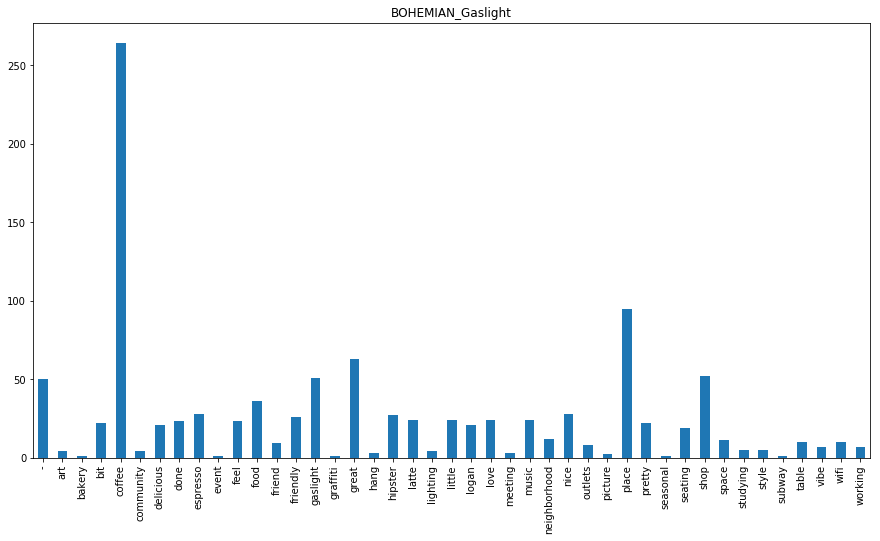

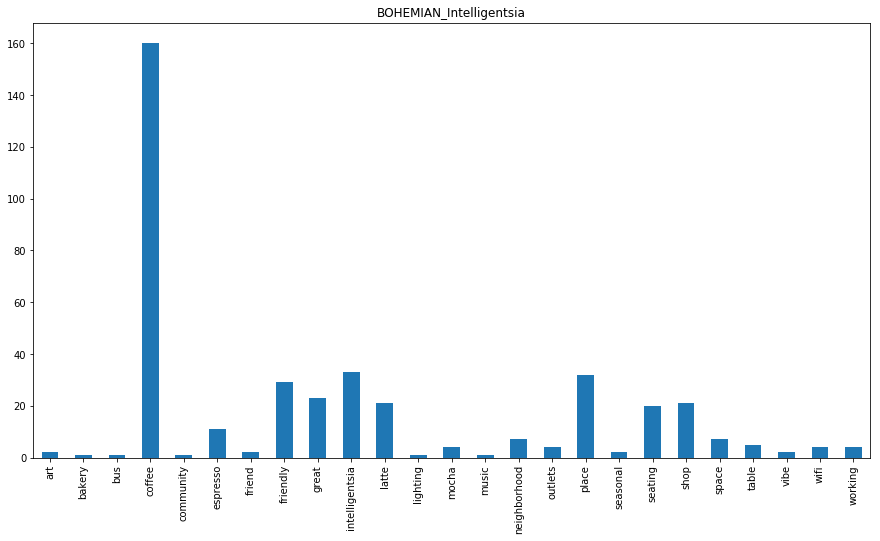

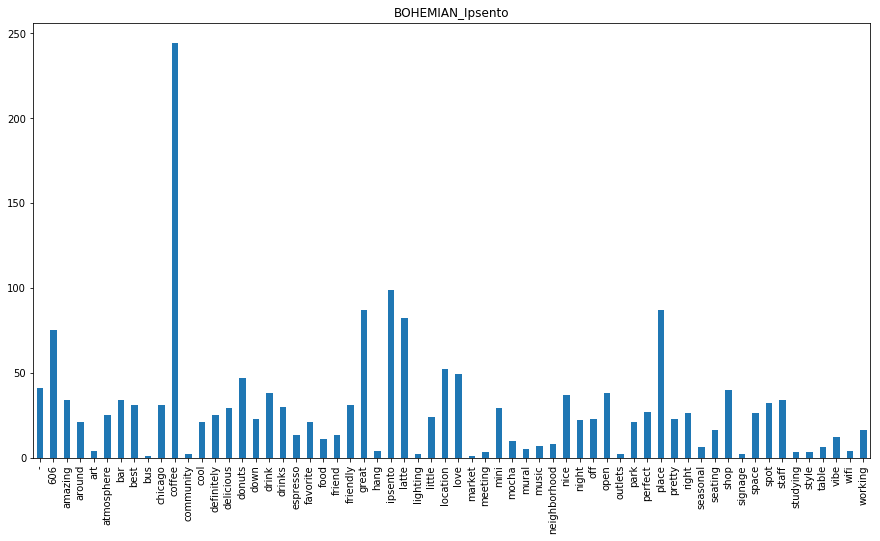

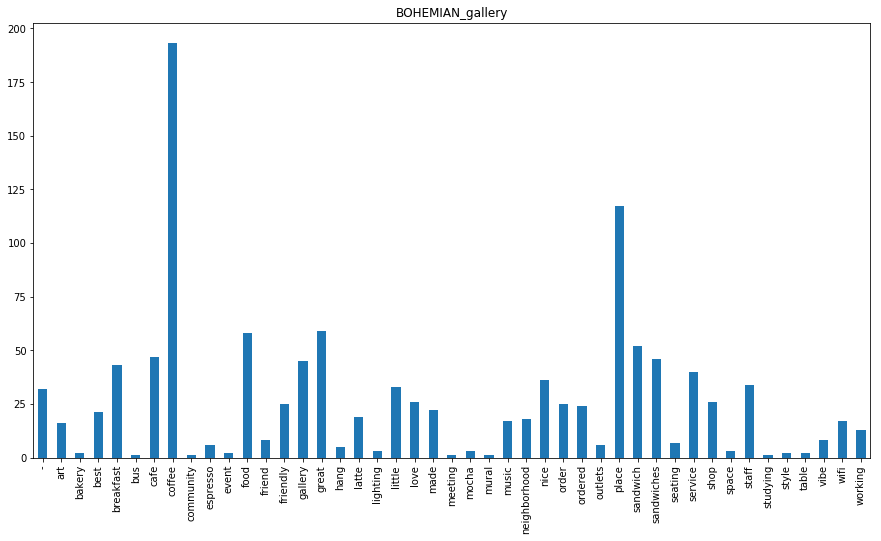

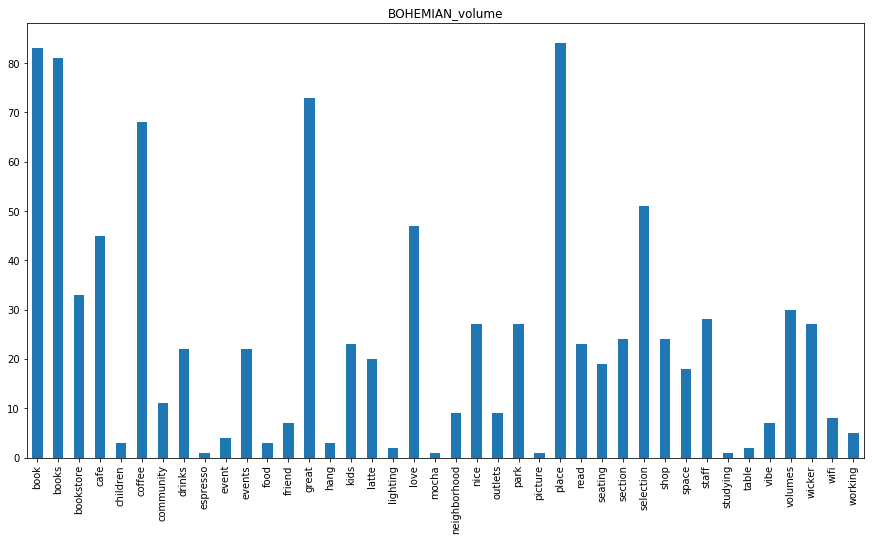

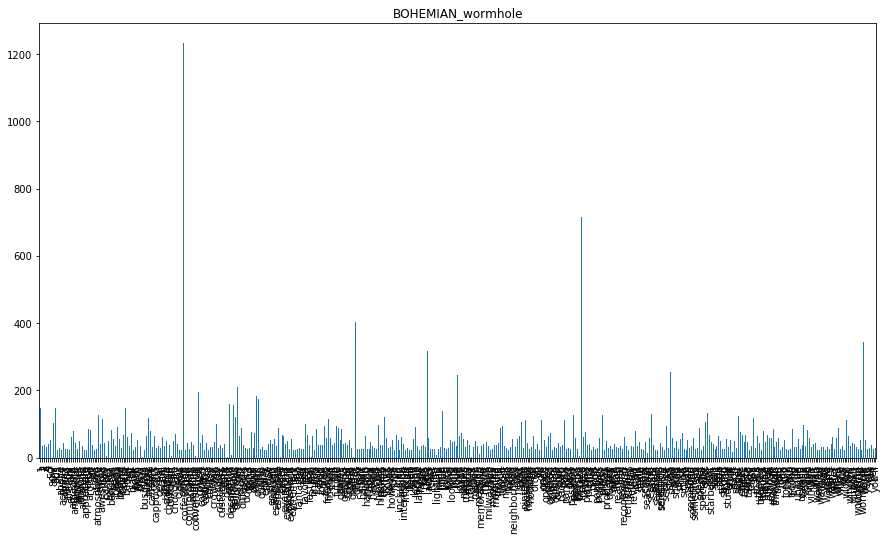

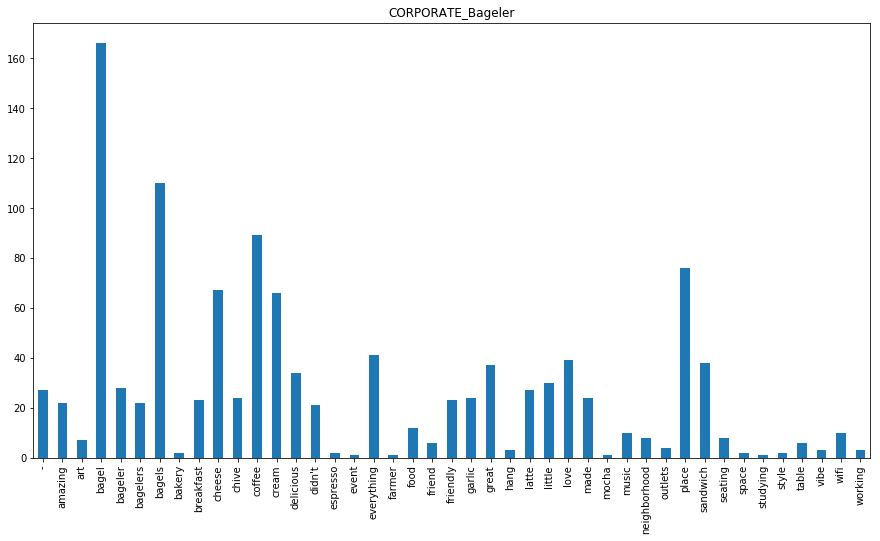

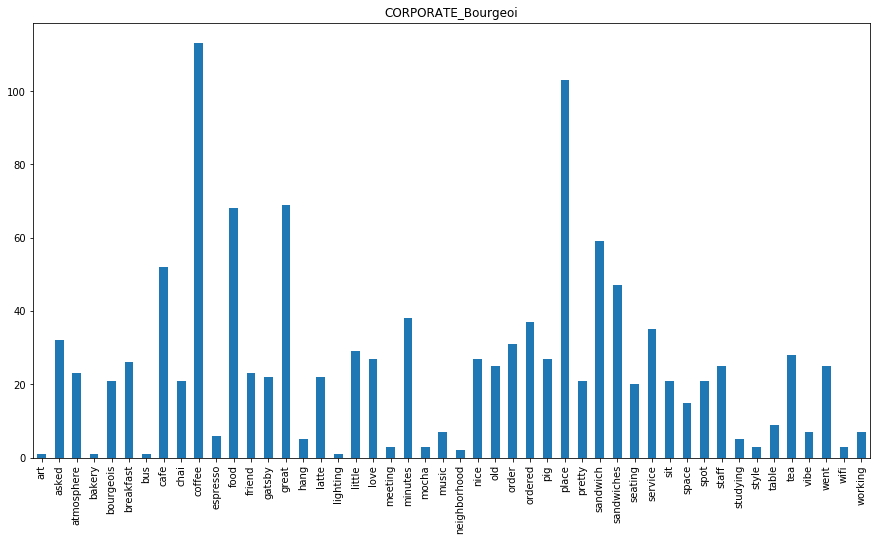

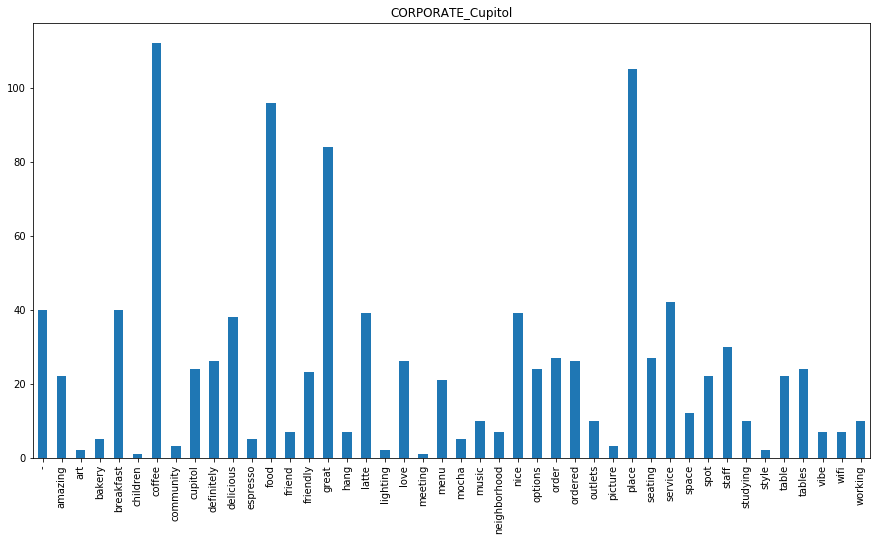

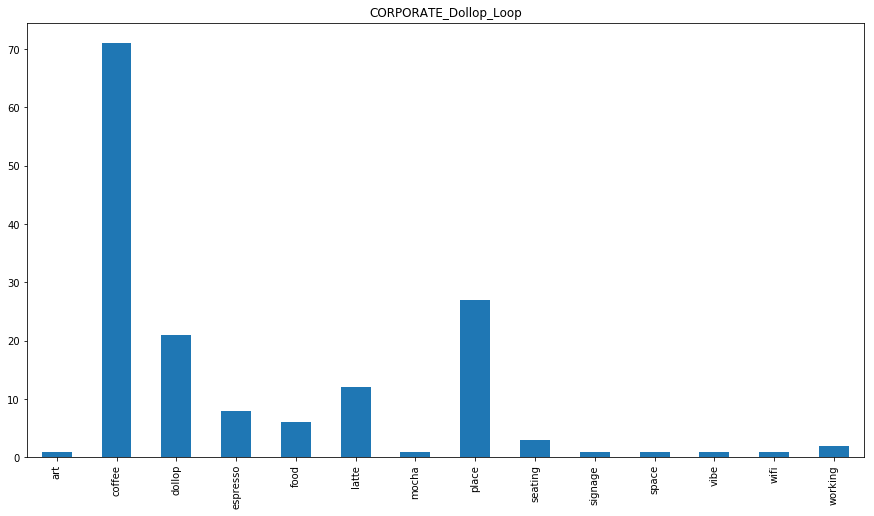

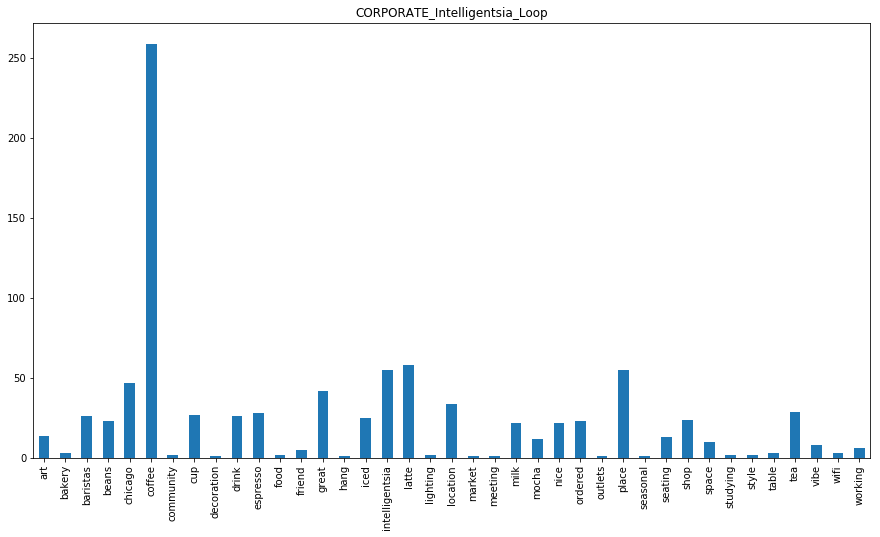

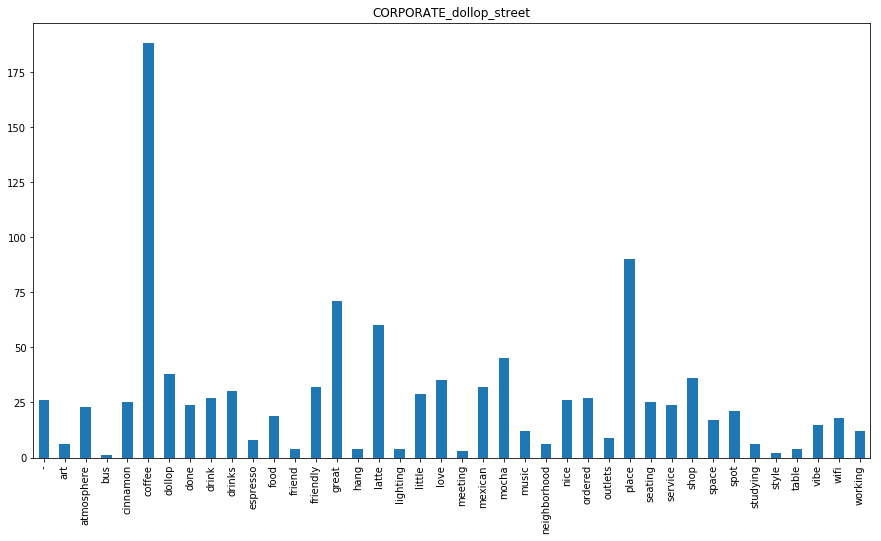

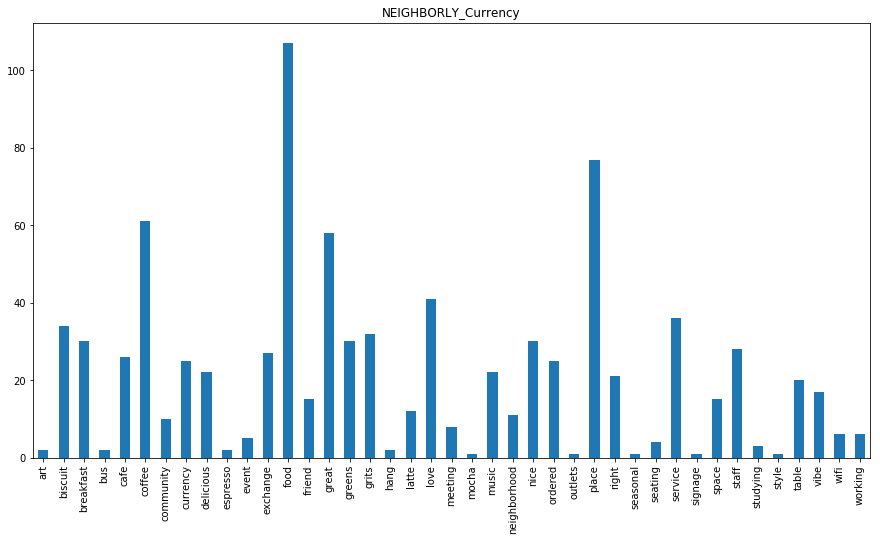

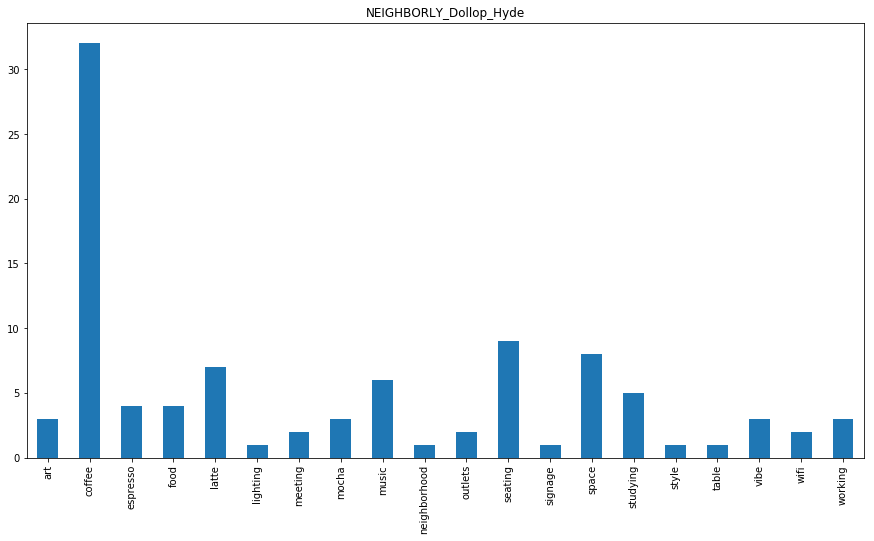

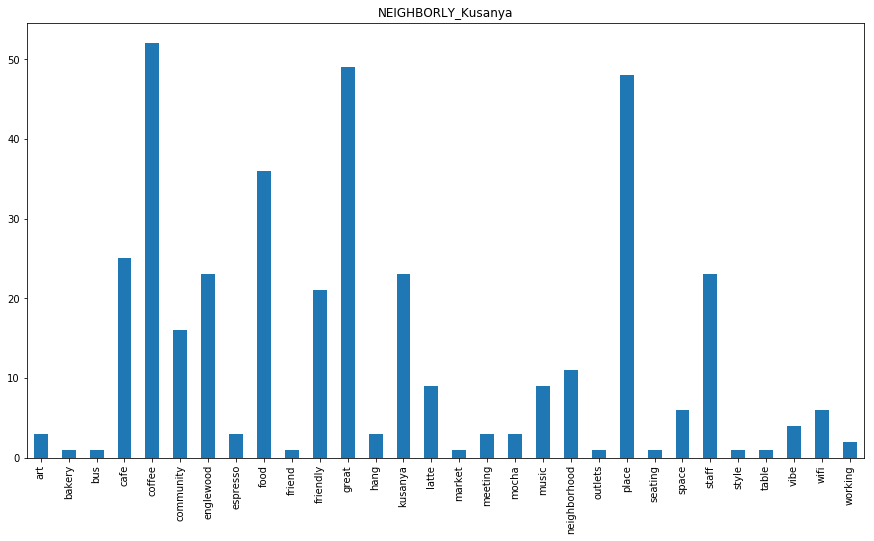

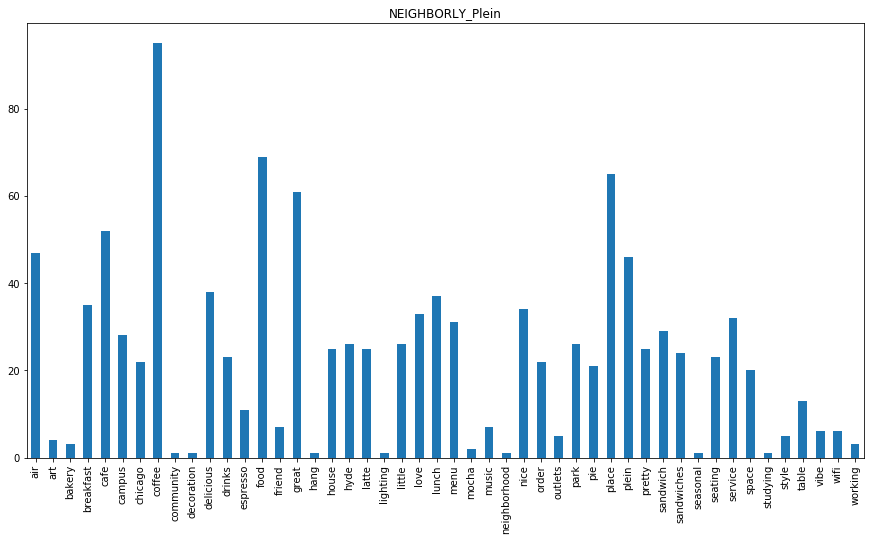

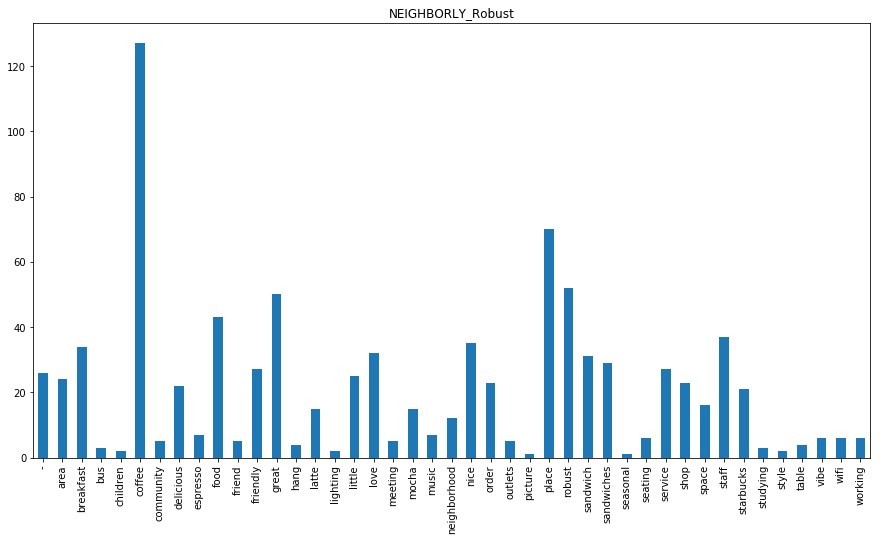

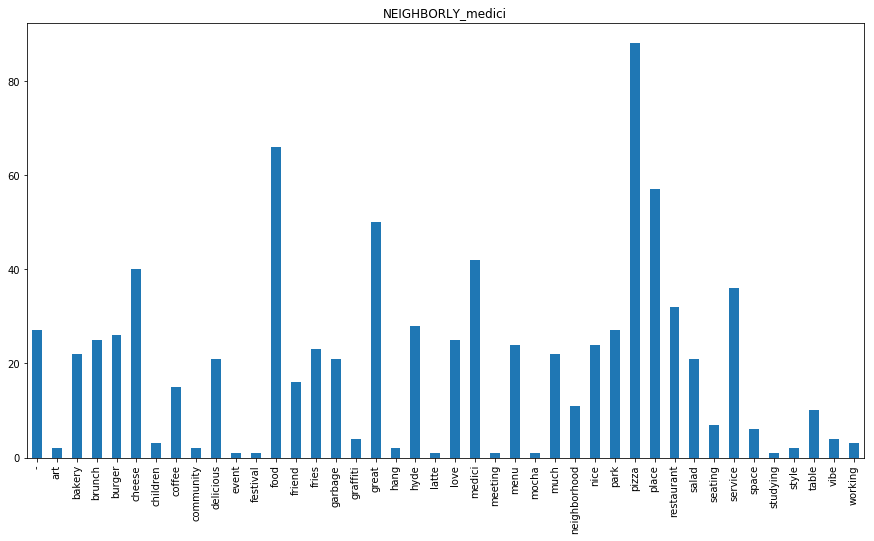

In [68]:
def createplot (csv_counter):
    """
    Creates plots for each business based on word frequencies.
    Saves plots to folder "Plots".
    
    :param csv_counter: A dictionary of dictionaries. 
              Each key is a business name, and each value is a dictionary.
              In that dictionary, the keys are words and frequencies are the values.
    :type  csv_counter: dict
    """
    # Create the bar graphs of top words for each business
    # Output the bar graphs to the folder "plots"
    df_occurences = pd.DataFrame (csv_counter)
    for column in df_occurences:
        name = column#.strip('scraped/').strip('.csv')
        plot = df_occurences[column].dropna()
        plot.plot(kind="bar")
        plt.title(name)
        fig = plt.gcf()
        fig.set_size_inches(15,8)
        plt.savefig('Plots/' + name + '.png', bbox_inches='tight')
        plt.show()
        
createplot(csv_counter)

In [71]:
def pipeline ():
    """
    Put everything together.
    """
    csv_reviews, names, csv_files = getReviews ("Raw_Scraped_Data/*.csv", 
                                            'Processed_Data/all_reviews.csv')
    word_list = createWordList (csv_reviews)
    csv_counter = findWordFreq (word_list)
    createplot(csv_counter)
#pipeline()

In [70]:
def GroupByLocation (names, word_list):
    """
    :param names: list of names of businesses
    :type  names: list
    :param word_list: A list where each element is string of all reviews for one business. 
    :type  word_list: list
    :returns: (list of group names, list of strings of concated reviews)
    :rtype:   (list, list)
    """
    
    listOfGroups = []
    for name in names:
        listOfGroups.append ( name.split('_')[0])
    setOfGroups = set (listOfGroups)
    
    placeAndReviews = {}
    for group in setOfGroups:
        placeAndReviews[group] = ''
        
    for i in range (len (names)):
        group = names[i].split('_')[0]
        review = placeAndReviews.get(group)
        placeAndReviews[group] = review + word_list[i]
     
    groups = []
    reviews = []
    for key, val in placeAndReviews.items():
        groups.append (key)
        reviews.append (val)
    #return placeAndReviews
    return (groups, reviews)
     
groups, groupReviews = GroupByLocation (names, word_list)

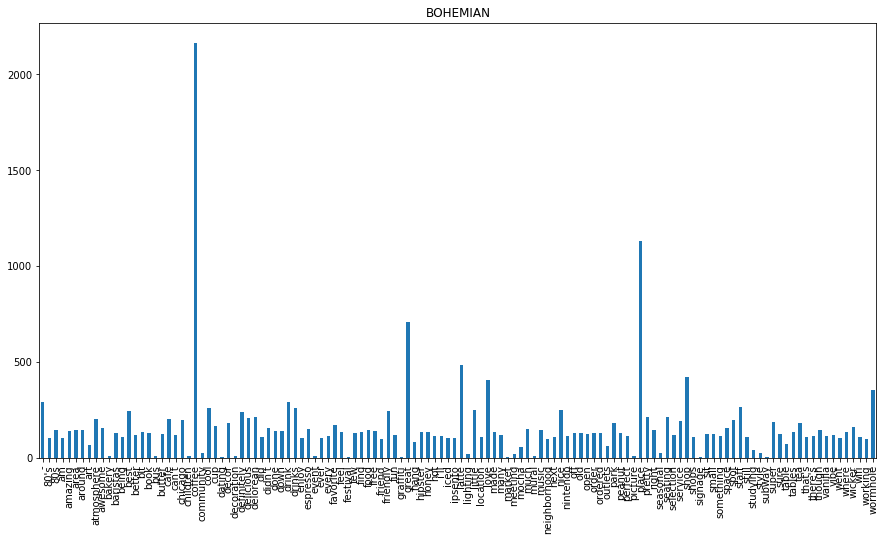

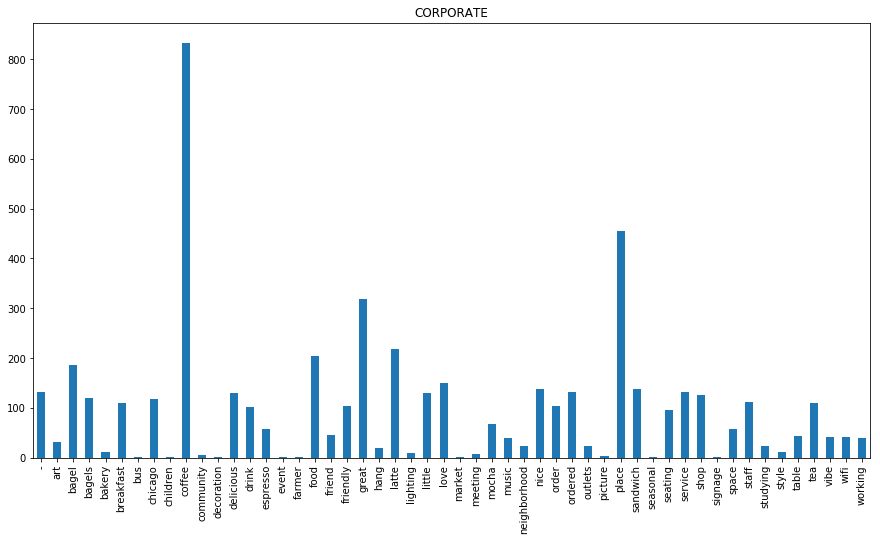

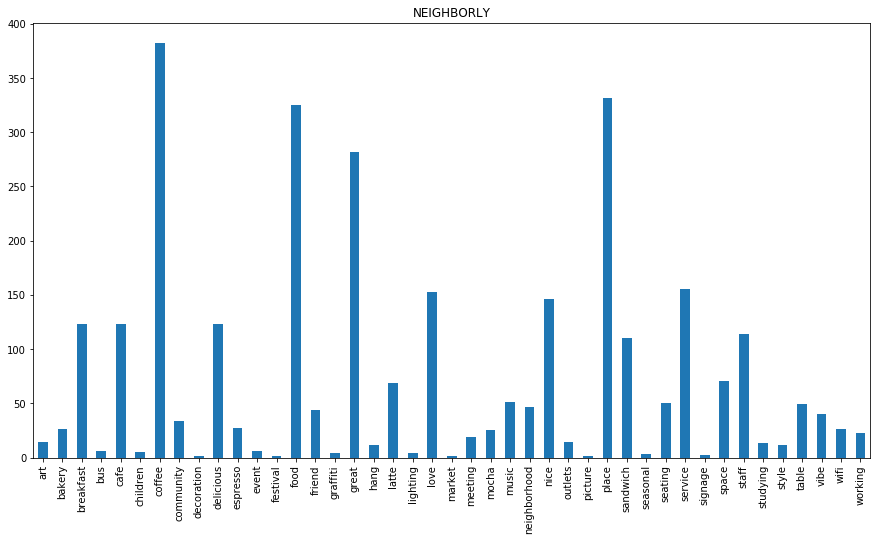

In [69]:
groupWordList = findWordFreq (groupReviews, groups, threshold=100)
createplot (groupWordList)

In [79]:
punct_groups, punct_groupReviews = GroupByLocation (names, punct_word_list)
punct_groupReviews[1][:500]

"cozy neighborhood spot for a good coffee and yummy sandwiches. we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done. if you're nice to the barista, they may make you a fun latte with funky art on it, and their latte flavors range from standard to different. the lavender one was lovely and the spicy one had just the right touch of heat. we got one of the sandwiches after a while and it came with veggie chips on a plate that looked like "

In [85]:
def groups_to_json (names, reviews, file_name):
    """
    Given keys and values, dump out a json file.
    
    :param names: List of groups
    :type  names: list
    :param reviews: List of strings, where each string are all the reviews for one group
    :type  reviews: list
    :param file_name: File name of output json
    :type  file_name: str
    """
    import json
    dict_of_reviews = {}
    for i in range (len (names)):
        dict_of_reviews[names[i]] = reviews[i]
        
    with open(file_name, 'w') as outfile:
        json.dump (dict_of_reviews, outfile)
    #return dict_of_reviews
    
groups_to_json (punct_groups, punct_groupReviews, 'Processed_Data/Grouped_Reviews')